# Chapter 4. 분류 모델

### knn- 분류모델 알고리즘

![alt text](appendix/image-6.png)

- 그림을 보면 샘플 X 주위에 가장 가까운 이웃 샘플 10개를 표시
- 사각형이 3개, 삼각형이 5개, 원이 2개
- 이웃한 샘플의 클래스를 확률로 삼는다면 샘플 X가 사각형일 확률은 30%, 삼각형일 확률은 50%, 원일 확률은 20%

- 상기와 같은 방식으로 k-nn 분류 알고리즘이 작동
타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류(multi-class classification)라고 부름

In [1]:
## Data Import, Library Import
import pandas as pd
from sklearn.model_selection import train_test_split

## 04-1. 로지스틱 회귀

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# Species 고윳값 확인
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


- 판다스 데이터프레임에서 하나의 열을 선택하면 1 차원 배열에 해당하는 판다스 시리즈(series) 객체가 반환
- Species 열을 선택할 때 fish[[’Species‘]]와 같이 두 개의 괄호를 사용하지 않도록 주의하세요. 이렇게 하면 fish_target이 데이터프레임이 됨

In [5]:
# Target 값 추출
fish_target = fish['Species']

In [6]:
# Test Train
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [7]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input) 
test_scaled = ss.transform(test_input)

### k-nn 모델 사용

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(train_scaled, train_target)
print(knc.score(train_scaled, train_target))
print(knc.score(test_scaled, test_target))

0.8907563025210085
0.85


- 이전에 직접 데이터를 불러와 머신러닝 학습을 시켰던 것 처럼 굳이 target 값을 0,1로 바꾸지 않아도 문자열 그대로 인식
-  다만 타깃값을 그대로 사이킷런 모델에 전달하면 **순서가 자동으로 알파벳 순**으로 매겨짐
- 따라서 `pd.unique(fish[‘Species’])`로 출력했던 순서와 다름 
K- NeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장
-  predict() 메서드는 친절 하게도 타깃값으로 예측을 출력

In [9]:
print(knc.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
print(knc.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [11]:
import numpy as np
proba = knc.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


- 4번째 샘플(위의 행렬에서 4번째 줄)을 기준으로 행렬 해석법은 다음과 같음

![alt text](appendix/image-7.png)

- 이 그림에 따라 계산한 확률이 가장 가까운 이웃들의 비율이 맞는지 체크

In [12]:
distances, indexes = knc.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


- Roach가 1개 Perch가 2개임 
- Roach(위 행렬에서 5번째)일 확률
$$
\frac{Roach\ 수:\ 1개}{전체\ 수:\ 3개} = \frac{1}{3}
$$

- Perch(위 행렬에서 3번째)일 확률
$$
\frac{Perch\ 수:\ 2개}{전체\ 수:\ 3개} = \frac{2}{3}
$$

- 현재 단순히 학습용 데이터 상 가까운게 저 3개이고, 3개 중에 1개가 roach, 2개가 perch이므로 perch일 확률이 높다 라고 해석되는게 맞음

### Logistic
로지스틱 회귀 logistic regresston는 이름은 회귀이지만 분류 모델입니다. 이 알고리즘은 선형 회귀와 동일 
하게 선형 방정식을 학습

$$
z = a \times (Weight) + b \times (Lengtb) + c \times (Diagonal) + d x\times(Height) + e \times (Width) + f
$$
- 상기의 식을 로지스틱 함수(Sigmoid 함수)로 사용

![alt text](appendix/image-8.png)

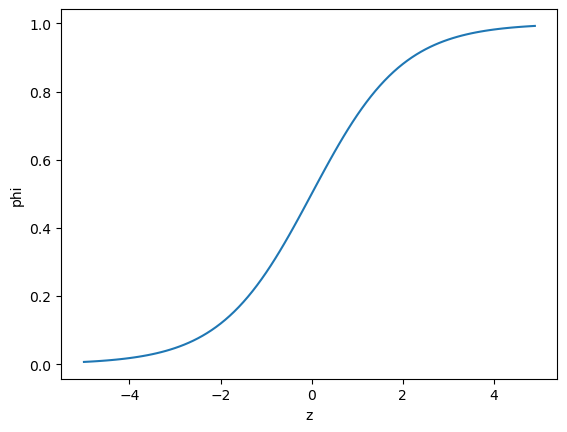

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi) 
plt.xlabel('z') 
plt.ylabel('phi') 
plt.show()

- z가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고, 
- z가 무한하게 큰 양수가 될 때는 1에 가까워짐 
- z가 0이 될 때는 0.5
- z가 어떤 값이 되더라도 $\phi$는 절대로 0~1 사이의 범위를 벗 
어날 수 없습니다. 
- 즉 0〜1 사이 값을 0〜100%까지 확률로 해석

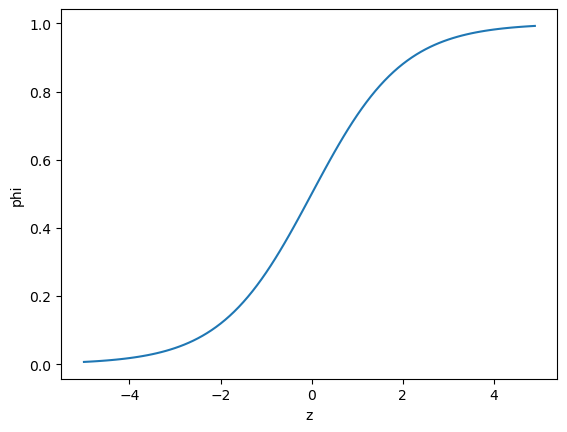

In [14]:
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi) 
plt.xlabel('z') 
plt.ylabel('phi') 
plt.show()

#### Logistic 이진분류
- 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있습니다. 이를 불리언 인덱싱 boolean indexing이라고 함.
- 도미와 빙어에 대한 비교 결과를 비트 OR 연산자(`|`)를 사용해 합치면 도미와 빙어에 대한 행만 골라낼 수 있습니다.

In [15]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


- 상기 처럼 True 인 것만 뱉어낼 수 있음을 이용해 도미, 방어 데이터 산출

In [16]:
#불리언 인덱싱을 적용하여 손쉽게 도미와 빙어 데이터만 골라냄
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
print(bream_smelt_indexes)

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(train_bream_smelt)
print(target_bream_smelt)

26      True
137    False
146     True
90     False
66     False
       ...  
71     False
106    False
14      True
92     False
102    False
Name: Species, Length: 119, dtype: bool
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [18]:
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)
print(lr.coef_, lr.intercept_)

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
['Bream' 'Smelt']
[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


- 상기 식에 따라 완성왼 회귀모델 방정식은 하기와 같음
$$
z = -0.40 \times (Weight) -0.5758 \times (Lengtb) -0.662 \times (Diagonal) -1.013 x\times(Height) -0.731 \times (Width) -2.161
$$

- 상기 식을 바탕으로 로지스틱 함수의 $z$ 값을 계산해볼 수 있음

In [19]:
# 처음 5개 훈련세트에 대해 z값 계산
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


이 $z$값을 시그모이드 함수에 대입하여 확률을 얻을 수 있습니다. -파이썬의 `scipy` 라이브러리에도 시그모이드 함수가 있습니다. 
- 바로 `expit()` 입니다. `np.exp ()` 함수를 사용

In [20]:
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


#### Logistic 다중 분류
-  LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용
- max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100
- 여기에 준비한 데이터셋을 사용해 모델을 훈련하면 반복 횟수가 부족하다는 경고가 발생하여 충분하게 훈련시키기 위해 반복 횟수를 1,000으로 변경

- 또 LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제
    -  이런 규제를 L2 규제라고 부름 
- 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절했습니다. 
- alpha가 커지면 규제도 커집니다. 

- LogisticRegression에서 규제를 제어하는 매개변수는 C인데 alpha와 반대로 작을수록 규제가 커짐 
- C의 기본값은 1 입니다. 여기에서는 규제를 조금 완화하기 위해 20으로 변경함

In [21]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 테스트 세트 예측 결과
print(lr.predict(test_scaled[:5]))

# 훈련 세트 예측 확률
proba = lr.predict_proba(test_scaled[:5])
print(proba.round(decimals=3))
print(lr.classes_)

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- 생선 7개 종류이니 7개 열, 5개 샘플 예측이니 5행

In [22]:
# coef_, intercept_ 출력
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- 5개의 특성을 사용하므로 coef_ 배열의 열은 5개
- 그런데 행이 7고, intercept도 7개나 있음에 따라 이 말은 이진 분류에서 보았던 $z$를 7개나 계산했다는 뜻임
- 이진 분류에서는 단일 시그모이드 함수를 사용하지만, 다중 분류에서는 Softmax 함수를 사용하여 7개의 $z$ 값을 확률로 변환함

-  소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0〜1 사이의 확률로 압축하고 전체 합이 1 이 되도록 만듦 
- 일반적인 맥스(max) 함수는 최댓값 하나를 고르지만 소프트맥스는 최댓값에 높은 확률을 할당하면서도 다른 값에도 작은 확률을 부여
- 그래서 소프트(soft)한 맥스(max)인 거죠. 이를 위해 지수 함수를 사용하기 때문에 정규화된 지수 함수를 사용
- 아래는 소프트 맥스 함수 계산 법이며, 신경망 배울때 나오니 잘 확인하세요

1. 각각의 (여기에선 feature가 총 7개 이니 7개의) $z$ 값들을 이용해 지수함수 $e^{z_1}$ 부터 ~ $e^{z_7}$ 값을 계산
2. 그 값들을 전부 더하면..
$$
e\_ sum = e^{z_1} + e^{z_2}+ e^{z_3}+ e^{z_4}+ e^{z_5}+ e^{z_6}+ e^{z_7}
$$
3. 각각의 $e^{z_n}$ 값들을 $e\_ sum$ 값들로 나눔

In [23]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax
proba = softmax(decision, axis=1) #  softmax()의 axis 매개변수는 소프트맥스를 계산할 축을 지정
print(proba.round(decimals=3))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 04-2. Stochastic Gradient Descent
- 훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘
- 손실 함수는 확률적 경사 하강법이 최적화할 대상
- 점진적 학습 aka 온라인 학습 : 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방법
- 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 미분값이 가장 큰 것을 찾음
- 훈련 세트를 한 번 모두 사용하는 과정을 에포크 epoch라고 부릅니다. 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행

한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용할 수도 있습니다. 이를 배치 경사 하강법 batch gradient descent

![alt text](appendix/image-9.png)

### 신경망 모델
확률적 경사 하강법을 꼭 사용하는 알고리즘이 있습니다. 바로 신경망 알고리즘입니다. 신경망은 일반적으로 많은 데이터 
를 사용하기 때문에 한 번에 모든 데이터를 사용하기 어렵습니다. 또 모델이 매우 복잡하기 때문에 수학적인 방법으로 해 
답을 얻기 어렵습니다. 신경망 모델이 확률적 경사 하강법이나 미니배치 경사 하강법을 사용

### Loss function
- 손실 함수는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준
- 머신러닝 모델 통해서 나온 값이랑 실제 값 차이 측정하기 위한 함수들
- 데이터가 count 같이 정수형이 실수형(연속적)인 경우 aka 미분 가능한 경우만 가능

### SGDClassifier

In [25]:
train_input, test_input, train_target, test_targer = train_test_split(fish_input, fish_target, random_state=42)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [44]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/user/miniforge3/envs/mldl/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


- 모델이 충분히 수렴하지 않았다는 경고 메시지에 따라 반복 횟수 조정은 필요

In [ ]:
# 호출할 때마다 1 에포크씩 이어서 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8907563025210085
0.9


- SGDCIassifier 객체에 **한 번에 훈련 세트 전체를 전달했지만 이 알고리즘은 전달한 훈련 세트에서 1 개씩 샘플을 꺼내어 경사 하강법 단계를 수행**

In [45]:
sc = SGDClassifier(loss='log_loss', random_state=42) 
train_score = [] 
test_score = [] 
classes = np.unique(train_target)

In [47]:
# 300번 에포크 훈련 진행
for i in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

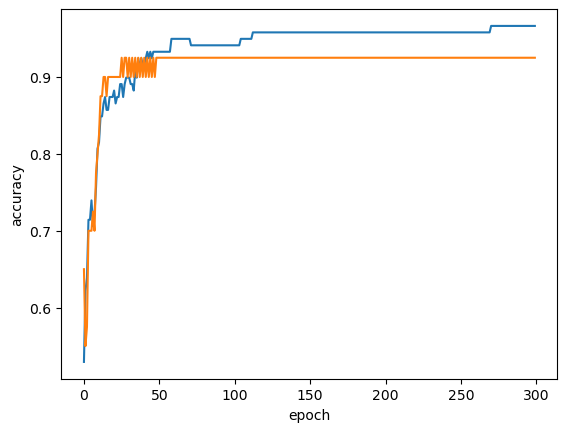

In [48]:
# 결과 확인
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 100번 가까워지자 정확도가 벌어지긴 함

In [49]:
# SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
